In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression

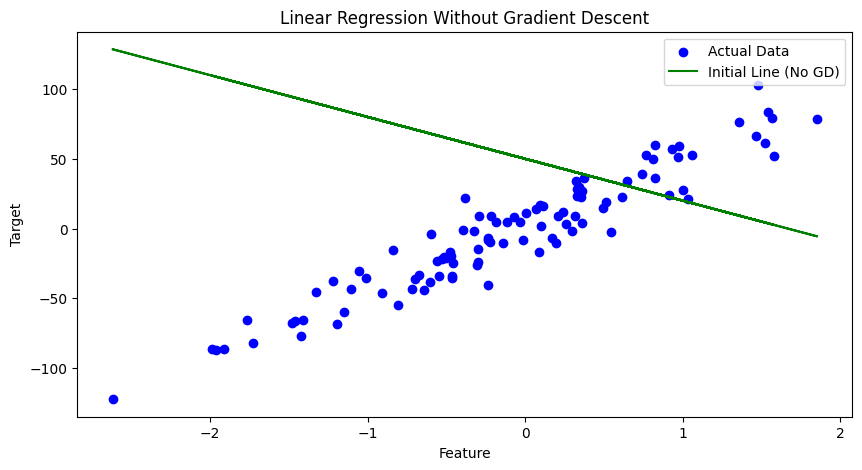

In [16]:
# Generate synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)
y = y.reshape(-1, 1)
m = X.shape[0]

X_b = np.c_[np.ones((m, 1)), X]

theta_start = np.array([[50.0], [-30.0] ])

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, X_b.dot(theta_start), color="green", label="Initial Line (No GD)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression Without Gradient Descent")
plt.legend()
plt.show()

In [188]:
### this here
theta_start.T.dot(X_b.T)
### corresponds to theta_start.T dot X with X = [x1, x2] as vectors with x1^0 = 1
### and can be rewritten as
### X_b.dot(theta_start).T
theta_start.T.dot(X_b.T)==X_b.dot(theta_start).T

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

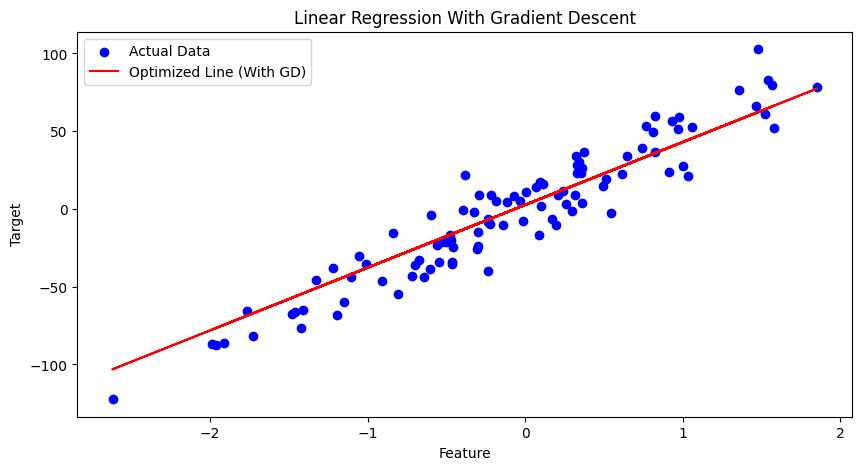

In [19]:
learning_rate = 0.015
n_iterations = 100
theta = theta_start.copy()
theta_hist = []

eps = 0.01

# Performing Gradient Descent
for _ in range(n_iterations):
    # Predictions
    y_pred = X_b.dot(theta)
    # Computing the gradient
    gradients = (2 / m) * X_b.T.dot(y_pred - y)
    # Updating parameters
    theta_hist.append(theta.copy())
    theta -= learning_rate * gradients
    ### break if their difference is smaller than a given epsilon :D, save space :D
    if np.all(np.abs(np.array(theta_hist[-1])-np.array(theta))<eps):
        break

theta_hist = np.squeeze(np.array(theta_hist))
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, X_b.dot(theta), color="red", label="Optimized Line (With GD)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression With Gradient Descent")
plt.legend()
plt.show()

In [5]:
def loss_function(X,y,theta0,theta1):
    theta = np.array([[theta0],[theta1]])
    h = np.sum((theta.T.dot(X.T)-y.T)**2)
    return h

In [6]:
theta0s = np.linspace(-100,100,201)
theta1s = np.linspace(-100,100,201)
t0s, t1s = np.meshgrid(theta0s,theta1s)

In [7]:
hs = np.zeros_like(t0s)
for q,t0 in enumerate(theta0s):
    for w,t1 in enumerate(theta1s):
        hs[w,q] = loss_function(X_b,y,t0,t1)

In [8]:
a = 0
b = 1

start = 0
end = -1
## loss function decrease towards the end, thus start have to be last values
levels = [loss_function(X_b,y,theta_hist[end,a],theta_hist[end,b]),
          (loss_function(X_b,y,theta_hist[end,a],theta_hist[end,b])+
           loss_function(X_b,y,theta_hist[start,a],theta_hist[start,b]))/10,
          (loss_function(X_b,y,theta_hist[end,a],theta_hist[end,b])+
           loss_function(X_b,y,theta_hist[start,a],theta_hist[start,b]))/5,
          (loss_function(X_b,y,theta_hist[end,a],theta_hist[end,b])+
           loss_function(X_b,y,theta_hist[start,a],theta_hist[start,b]))/3,
          (loss_function(X_b,y,theta_hist[end,a],theta_hist[end,b])+
           loss_function(X_b,y,theta_hist[start,a],theta_hist[start,b]))/2,
          loss_function(X_b,y,theta_hist[start,a],theta_hist[start,b]),
          loss_function(X_b,y,theta_hist[start,a],theta_hist[start,b])*2,
          loss_function(X_b,y,theta_hist[start,a],theta_hist[start,b])*3,
          loss_function(X_b,y,theta_hist[start,a],theta_hist[start,b])*4
          ]

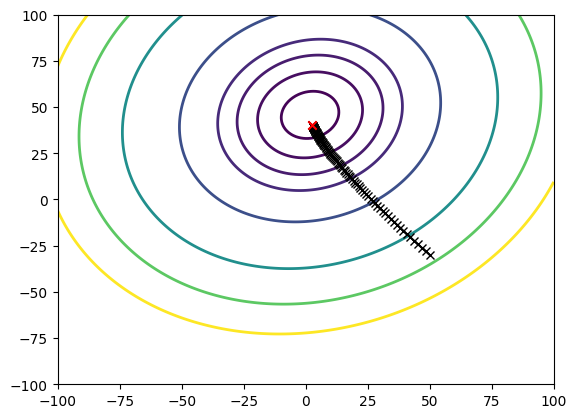

In [20]:
fig,ax = plt.subplots()
ax.contour(theta0s,theta1s,hs,linewidths=2,levels=np.array(levels))
ax.plot(theta_hist[:,0],theta_hist[:,1],marker='x',color='black')
ax.scatter(theta_hist[end,0],theta_hist[end,1],color='r',marker='x',zorder=5)
fig.savefig("final_parameter_space.png",bbox_inches='tight',dpi=300)

In [21]:
plt.close('all')
for q,theta in enumerate(theta_hist):

    fig, axes = plt.subplots(1,2,figsize=(10, 5))

    ax = axes[0]
    ax.scatter(X, y, color="blue", label="Actual Data")
    ax.plot(X, X_b.dot(theta), color="red", label="Fitting Line")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    ax.set_title("Linear Regression Gradient Descent")
    ax.legend()

    ax = axes[1]
    ax.contour(theta0s,theta1s,hs,lw=2,levels=levels)
    ax.plot(theta_hist[:q+1,0],theta_hist[:q+1,1],marker='x',color='black')
    ax.scatter(theta_hist[q,0],theta_hist[q,1],color='r',marker='x',zorder=5)
    fig.savefig('grad_descent_%03d.png'%q,dpi=300,bbox_inches='tight')
    plt.close(fig)

/tmp/ipykernel_18159/2078274502.py:15: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(theta0s,theta1s,hs,lw=2,levels=levels)
